# 2. TensorFlow Sample

In [1]:
# TensorFlow version
import tensorflow as tf

print(tf.__version__)

1.2.1


## 2.1 Linear Regression

In [2]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [3]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [4]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [5]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [6]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

Epoch 0050 cost= 0.081048638 W= 0.214251 b= 1.05572
Epoch 0100 cost= 0.080583252 W= 0.216353 b= 1.0406
Epoch 0150 cost= 0.080171354 W= 0.21833 b= 1.02637
Epoch 0200 cost= 0.079806909 W= 0.22019 b= 1.013
Epoch 0250 cost= 0.079484373 W= 0.221938 b= 1.00042
Epoch 0300 cost= 0.079198875 W= 0.223583 b= 0.988585
Epoch 0350 cost= 0.078946188 W= 0.22513 b= 0.977455
Epoch 0400 cost= 0.078722529 W= 0.226585 b= 0.966987
Epoch 0450 cost= 0.078524560 W= 0.227954 b= 0.957142
Epoch 0500 cost= 0.078349352 W= 0.229241 b= 0.947883
Epoch 0550 cost= 0.078194283 W= 0.230451 b= 0.939176
Epoch 0600 cost= 0.078056999 W= 0.231589 b= 0.930987
Epoch 0650 cost= 0.077935450 W= 0.23266 b= 0.923285
Epoch 0700 cost= 0.077827863 W= 0.233667 b= 0.91604
Epoch 0750 cost= 0.077732578 W= 0.234614 b= 0.909227
Epoch 0800 cost= 0.077648222 W= 0.235505 b= 0.902818
Epoch 0850 cost= 0.077573538 W= 0.236343 b= 0.896791
Epoch 0900 cost= 0.077507377 W= 0.237131 b= 0.891123
Epoch 0950 cost= 0.077448793 W= 0.237872 b= 0.885791
Epoch 

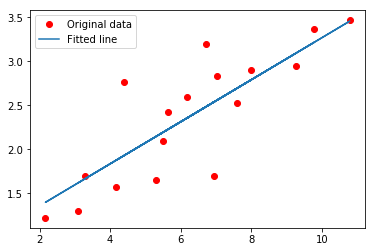

In [7]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

## 2.1 MNIST For ML Beginners

https://www.tensorflow.org/get_started/mnist/beginners#mnist-for-ml-beginners

In [8]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [9]:
x = tf.placeholder("float",[None,784])
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)

In [10]:
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)


sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

In [11]:
for _ in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9014
